In [1]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
import matplotlib.pyplot as plt
from sklearn import metrics

import sys
sys.path.append("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/")
from plotutils import *

plt.style.use("/home/jorenvanherck/Documents/gptchallengeV2/gptchem-gptj/plotutils/kevin.mplstyle")

FOLDER = 'out'

In [2]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 36


In [4]:

compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)


In [5]:
compiled_res = pd.DataFrame(compiled_res_list)
groups = ['bins', 'num_epochs', 'representation','target',]
grouped_res =compiled_res.groupby(groups).agg(['mean', 'sem'])


In [6]:
grouped_res


size       accuracy            \
                                         mean  sem      mean       sem   
bins num_epochs representation target                                    
2    25         Sequence       min_pdb   75.0  0.0  0.826667  0.035277   
                               min_plus  75.0  0.0  0.640000  0.023094   
                               pdb_plus  75.0  0.0  0.953333  0.006667   
                first_20       min_pdb   75.0  0.0  0.740000  0.011547   
                               min_plus  75.0  0.0  0.620000  0.052915   
                               pdb_plus  75.0  0.0  0.786667  0.033333   
                lenght         min_pdb   75.0  0.0  0.573333  0.076884   
                               min_plus  75.0  0.0  0.620000  0.023094   
                               pdb_plus  75.0  0.0  0.640000  0.011547   
                shuffle_seq    min_pdb   75.0  0.0  0.753333  0.037118   
                               min_plus  75.0  0.0  0.640000  0.061101   
                               pdb_plus  75.0  0.0  0.860000  0.020000   

                                         f1_macro            f1_micro  \
                                             mean       sem      mean   
bins num_epochs representation target                                   
2    25         Sequence       min_pdb   0.826087  0.035716  0.826667   
                               min_plus  0.638970  0.023695  0.640000   
                               pdb_plus  0.953283  0.006653  0.953333   
                first_20       min_pdb   0.738975  0.011704  0.740000   
                               min_plus  0.616874  0.052852  0.620000   
                               pdb_plus  0.784080  0.034100  0.786667   
                lenght         min_pdb   0.572074  0.076396  0.573333   
                               min_plus  0.616917  0.023601  0.620000   
                               pdb_plus  0.638483  0.012625  0.640000   
                shuffle_seq    min_pdb   0.750772  0.038048  0.753333   
                               min_plus  0.638391  0.061032  0.640000   
                               pdb_plus  0.859536  0.020054  0.860000   

                                                      kappa                lr  \
                                              sem      mean       sem    mean   
bins num_epochs representation target                                           
2    25         Sequence       min_pdb   0.035277  0.653333  0.070553  0.0003   
                               min_plus  0.023094  0.280000  0.046188  0.0003   
                               pdb_plus  0.006667  0.906667  0.013333  0.0003   
                first_20       min_pdb   0.011547  0.480000  0.023094  0.0003   
                               min_plus  0.052915  0.240000  0.105830  0.0003   
                               pdb_plus  0.033333  0.573333  0.066667  0.0003   
                lenght         min_pdb   0.076884  0.146667  0.153768  0.0003   
                               min_plus  0.023094  0.240000  0.046188  0.0003   
                               pdb_plus  0.011547  0.280000  0.023094  0.0003   
                shuffle_seq    min_pdb   0.037118  0.506667  0.074237  0.0003   
                               min_plus  0.061101  0.280000  0.122202  0.0003   
                               pdb_plus  0.020000  0.720000  0.040000  0.0003   

                                              
                                         sem  
bins num_epochs representation target         
2    25         Sequence       min_pdb   0.0  
                               min_plus  0.0  
                               pdb_plus  0.0  
                first_20       min_pdb   0.0  
                               min_plus  0.0  
                               pdb_plus  0.0  
                lenght         min_pdb   0.0  
                               min_plus  0.0  
                               pdb_plus  0.0  
                shuffle_seq    min_pdb   0.0  
       

# Plot Bar plot

['Sequence', 'first_20', 'lenght', 'shuffle_seq']
Sequence
first_20
lenght
shuffle_seq


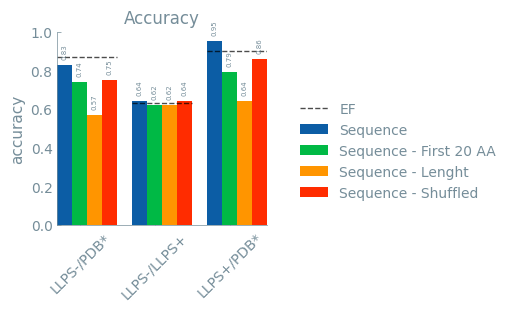

In [7]:
REPRES_DICT = {'shuffle_seq': 'Sequence - Shuffled',
               'first_20': 'Sequence - First 20 AA',
               'lenght': 'Sequence - Lenght',
               'Sequence': 'Sequence'
               }

TARGET_DICT = {'min_pdb': 'LLPS-/PDB*',
               'min_plus': 'LLPS-/LLPS+',
               'pdb_plus': 'LLPS+/PDB*',
               }

import numpy as np
COLORS = ['Forestgreen', 'maroon', 'purple', 'red']
targets = list(compiled_res['target'].unique())
represenations = sorted(list(compiled_res['representation'].unique()))
print(represenations)
COLOR_DICT = {t:c for t,c in zip(represenations, COLORS[0:len(represenations)])}
dict_final = {r:[] for r in represenations}

METRIC = 'accuracy'
WIDTH = 0.20
multiplier = 0
x = np.arange(len(targets))

for target in targets:
    for repr in represenations:
        df_part = compiled_res.loc[(compiled_res['target'] == target) & (compiled_res['representation'] == repr)]
        if len(df_part) == 0:
            mean_acc = 0
        else:
            mean_acc= df_part[METRIC].mean()
        dict_final[repr].append(mean_acc)

fig, ax = plt.subplots(layout='compressed', figsize = (5,3))
for representation, metric_values in dict_final.items():
    print(representation
          )
    representation = REPRES_DICT[representation]
    metric_values = [round(m, 2) for m in metric_values]
    offset = WIDTH * multiplier
    rects = ax.bar(x + offset, metric_values, WIDTH, label=representation, 
                   #yerr = 5,
                   #color = COLOR_DICT[attribute]
                   )
    ax.bar_label(rects, padding=4, rotation = 90, size = 5)
    multiplier += 1

ax.set_ylabel(METRIC)
ax.set_title(METRIC.capitalize())
targets_labels = [TARGET_DICT[target] for target in targets]
ax.set_xticks(x + WIDTH, targets_labels, rotation = 45)
ax.set_ylim(0, 1)

ax.hlines(0.87, -0.1, 0.7 , colors='black', linestyles='--', alpha = 0.7)
ax.hlines(0.63, 0.9, 1.7 ,colors='black', linestyles='--', alpha = 0.7)
ax.hlines(0.9, 1.9, 2.7 ,colors='black', linestyles='--', alpha = 0.7, label = 'EF')

ax.legend(ncols=1, bbox_to_anchor=(1.1, 0.7))

plt.savefig('LLPS_barplot.pdf')
plt.show()

In [8]:
import numpy as np
def plot_bar_accuracy(df:pd.DataFrame):
    df = (df.loc[2,25,'Sequence', 75])
    full_acc_dict = {}
    for row in df.iterrows():
        target = row[0]
        acc = row[1]['accuracy']['mean']
        full_acc_dict.update({target:acc})
    print(full_acc_dict)

    bar_labels = ['LLPS- / PDB*', 'LLPS+ / LLPS -', 'LLPS+ / PBD*']

    bar_colors = ['tab:red', 'tab:blue', 'tab:orange']


    fig, ax = plt.subplots(layout='constrained')
    ax.bar(bar_labels, full_acc_dict.values(), color = bar_colors)
    ax.set_ylim(0,1)
    ax.tick_params(labelsize = 16)
    plt.savefig('initialDatasets.pdf')
#plot_bar_accuracy(grouped_res)

# Plot Confusion Matrix

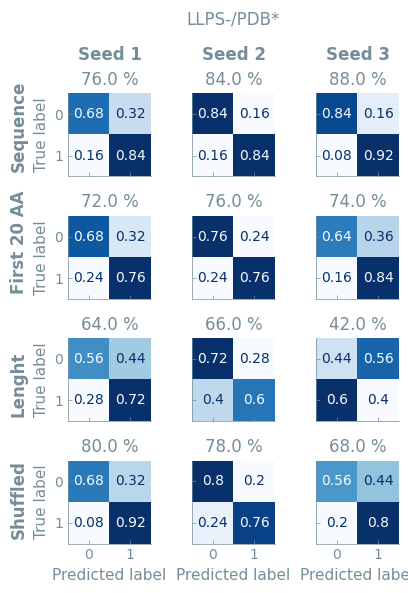

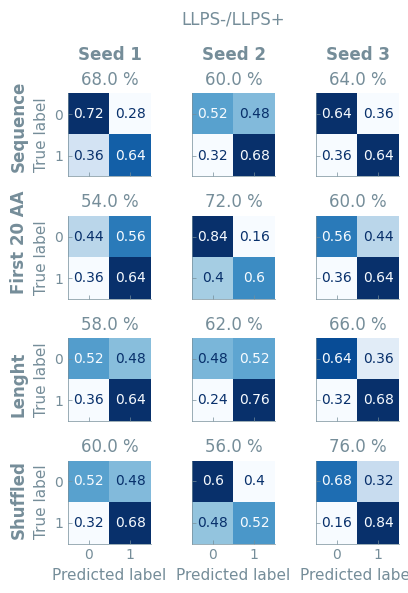

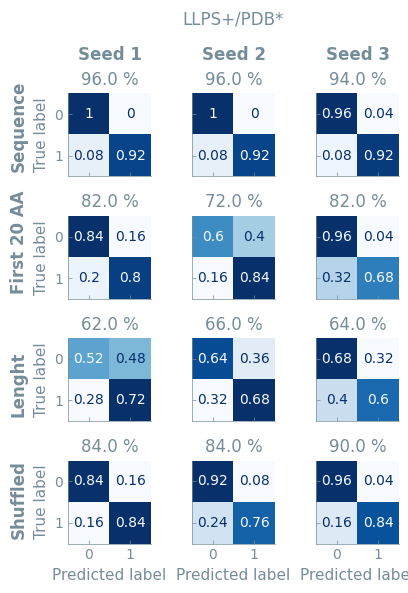

In [10]:
for target in targets:
    fig, axs = plt.subplots(len(represenations), 3,
                            figsize = (6,6),
                            tight_layout = True,
                            sharex=True,
                            sharey=True,
                            )
    fig.suptitle(TARGET_DICT[target])

    for i, repre in enumerate(represenations):
        axs[i, 0].text(-1.9,1.3, 
                       REPRES_DICT[repre].split('- ')[-1], 
                       rotation = 90,
                       size = 12,
                       weight = 'bold'
                       )
        files = [file for file in os.listdir('predictions') if file.endswith(f"_{target}_{repre}_25epoch_75size.csv")]
        
        dfs = [pd.read_csv(os.path.join('predictions', file)) for file in files]

        for j, df in enumerate(dfs):
            df_test =  df.loc[df['partition'] == 'test']
            true = df_test[target]
            pred = df_test['prediction']

            confusion_matrix = metrics.confusion_matrix(true, pred)
            confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]


            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_normalized, display_labels = ['0','1'])
            cm_display.plot(ax= axs[i,j], cmap=plt.cm.Blues, colorbar=False)

            ac = metrics.accuracy_score(true, pred)
            axs[i,j].set_title(f"{round(ac*100, 2)} %")

            if i != 3:
                axs[i,j].set_xlabel('')
            if j != 0:
                axs[i,j].set_ylabel('')
            
            if i ==0:
                axs[i,j].text(-0.25,-1.3, f'Seed {j+1}',
                        rotation = 0,
                       size = 12,
                       weight = 'bold')
            
            fig.savefig(f'{target}_ConfusionMatrices.pdf')


